# General settings and loading of files

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

from IPython.display import display, Math, Latex
from matplotlib import cm

% matplotlib inline
% load_ext autoreload
% autoreload 2

pd.options.display.max_columns = 40  # Affy csv has 30 fields
pd.options.display.mpl_style = 'default'

mpl.rc('figure', figsize=(13, 7))
mpl.rc('axes', titlesize=17, labelsize=14)
mpl.rc('xtick', labelsize=11)
mpl.rc('ytick', labelsize=11)
mpl.rc('font', family='serif')
mpl.rc('legend', fontsize=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%run helpers/data_munging_functions.py
%run helpers/number_helpers.py

In [43]:
%run discriminate_present_vs_missing.py

GALANTER_CSV = '~/tesina/galanter_SNPs.csv'
LAT1_CSV = '~/tesina/affy-LAT1/Axiom_GW_LAT.na35.annot.csv'  # 1.1Gb file!
# Smaller file for testing:
# LAT1_CSV_SMALL = "affy-LAT1/Axiom_GW_LAT.na35.annot.TRUNCATED.csv"

galanter, present, missing = discriminate_present_vs_missing(
    GALANTER_CSV, LAT1_CSV, dumpdir="dumpfiles")

In [44]:
print("{} Galanter AIMs".format(len(galanter)))
print("{} present in LAT".format(len(present)))
print("{} missing in LAT".format(len(missing)))

446 Galanter AIMs
180 present in LAT
266 missing in LAT


In [45]:
HUMAN_GENOME = '/home/juan/tesina/human_genome.txt'
genome = pd.read_csv(HUMAN_GENOME, delimiter="\t")
centromere_info = genome['centromere'].apply(lambda e: pd.Series(e.split(',')).astype(int))
genome = genome.drop('centromere', axis=1)
genome = pd.concat([genome, centromere_info], axis=1)
genome = genome.set_index('ID')
genome.columns = ['length', 'centromere_start', 'centromere_end']
genome = genome.drop(['X', 'Y'])
genome.index = genome.index.rename('chr')
genome.index = genome.index.astype(int)  # This only works after removing X and Y

### Distancias entre los AIMs por cromosoma

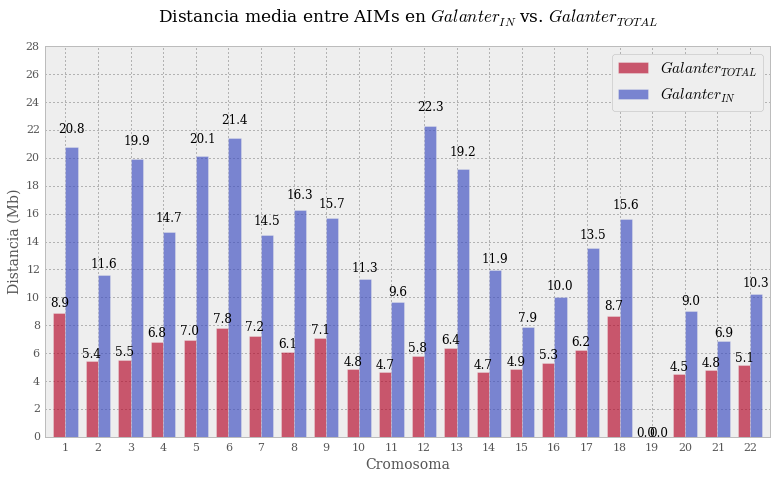

In [46]:
% run SNP_distances_plots.py

galanter_vs_present_mean_distance_plot(galanter, present, genome)
plt.show()

#### Discusión

* Las distancias medias son mucho mayores en $Galanter_{LAT}$ que en $Galanter_{all}$. En casos extremos, llega a más de 20 Mpb promedio entre AIMs, cuando esas distancias promedio no superan los 8 Mpb en el panel original.

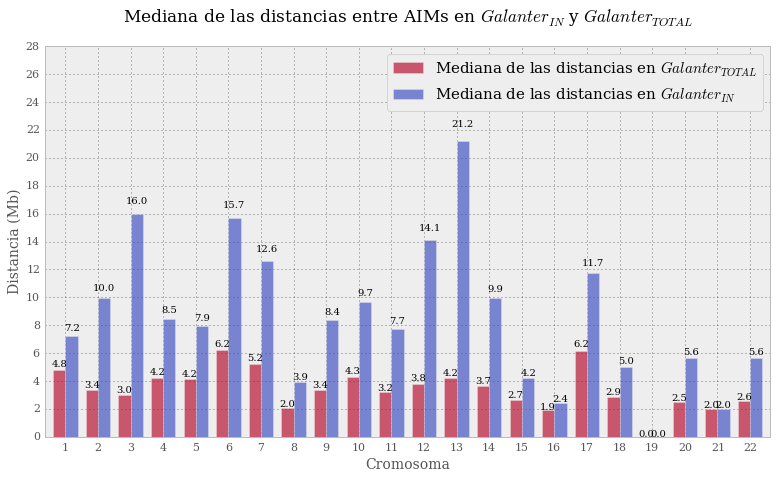

In [47]:
% run data_munging/distances.py

galanter_vs_present_median_distance_plot(galanter, present, genome)
plt.show()

### Discusión

__Nota__: hay un solo AIM en Galanter para el cromosoma 19, de modo que no se grafican distancias.

* En algunos casos extremos, hay hasta 1.4 Mpb (cromosoma 1) y 1 Mpb (cromosoma 8) de distancia entre dos AIMs contiguos.

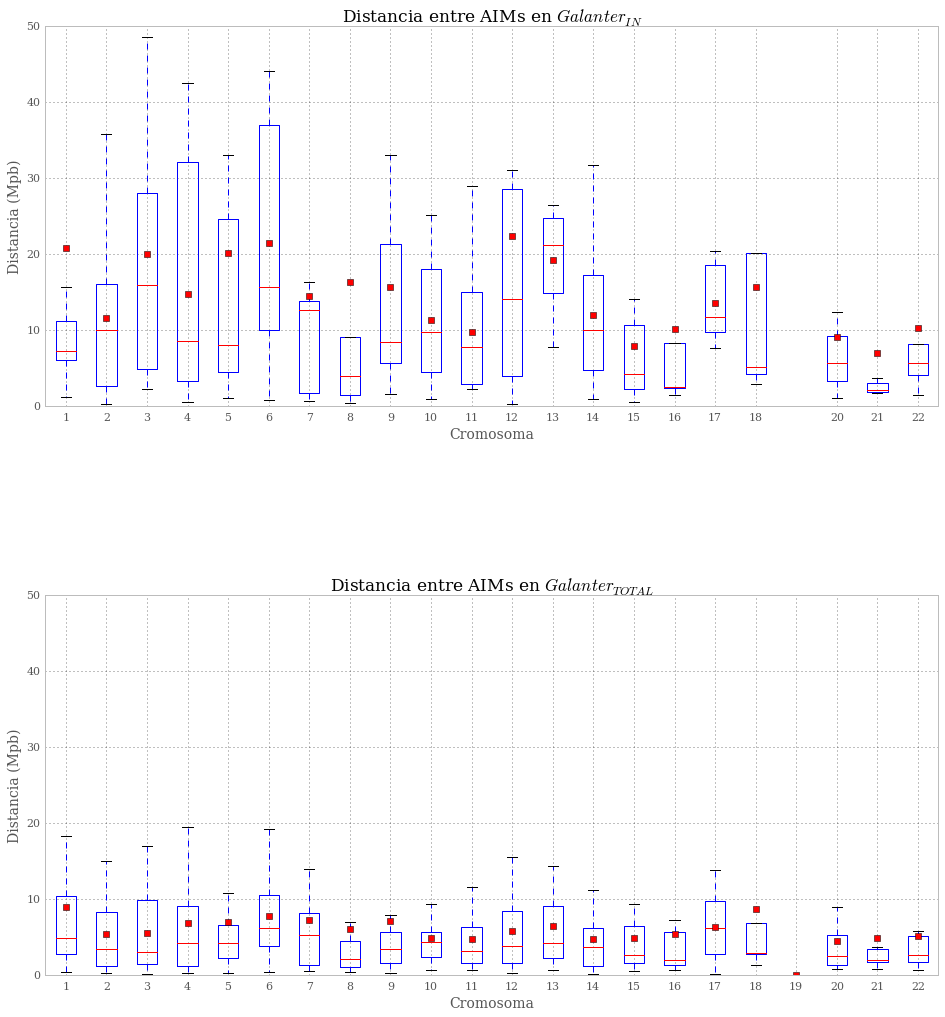

In [79]:
% run data_munging/distances.py

ax1 = plt.subplot(211)
ax1 = distances_boxplot(present, genome, ax=ax1, showfliers=False, showmeans=True,
                        title=r"Distancia entre AIMs en $Galanter_{IN}$")

ax2 = plt.subplot(212, sharey=ax1)
ax2 = distances_boxplot(galanter, genome, ax=ax2, showfliers=False, showmeans=True,
                        title=r"Distancia entre AIMs en $Galanter_{TOTAL}$")

f = ax2.figure
f.set_figheight(17)
f.set_figwidth(16)

plt.show()

**DISCUSIÓN**

- Hay un incremento evidente en las distancias medias y las medianas de distancias entre AIMs al quitar todos los AIMs ausentes en LAT-1. En general se puede observar que en $GALANTER_{IN}$ casi todas las medianas superan las 10 Mb de distancia entre AIMs, mientras que en $GALANTER_{TOTAL}$ todas se mantienen por debajo de ese valor, rondando más bien las 5 Mb.
- Con los outliers (`showfliers=True`) la diferencia se agranda aún más.

In [49]:
% run data_munging/distances.py
% run stats_tests.py

df = snp_distances(galanter, present, genome)
t_test(df['mean_distance_galanter'], df['mean_distance_present'])

t_test(t=-7.6962288203507194, p=2.0496477225364935e-09)

In [50]:
format_numbers(genome)

,length,centromere_start,centromere_end
chr,,,
1,"249,239,465","121,535,434","124,535,434"
2,"243,199,373","92,326,171","95,326,171"
3,"199,411,731","90,504,854","93,504,854"
4,"191,252,270","49,660,117","52,660,117"
5,"180,915,260","46,405,641","49,405,641"
6,"171,115,067","58,830,166","61,830,166"
7,"159,138,663","58,054,331","61,054,331"
8,"146,364,022","43,838,887","46,838,887"
9,"141,213,431","47,367,679","50,367,679"


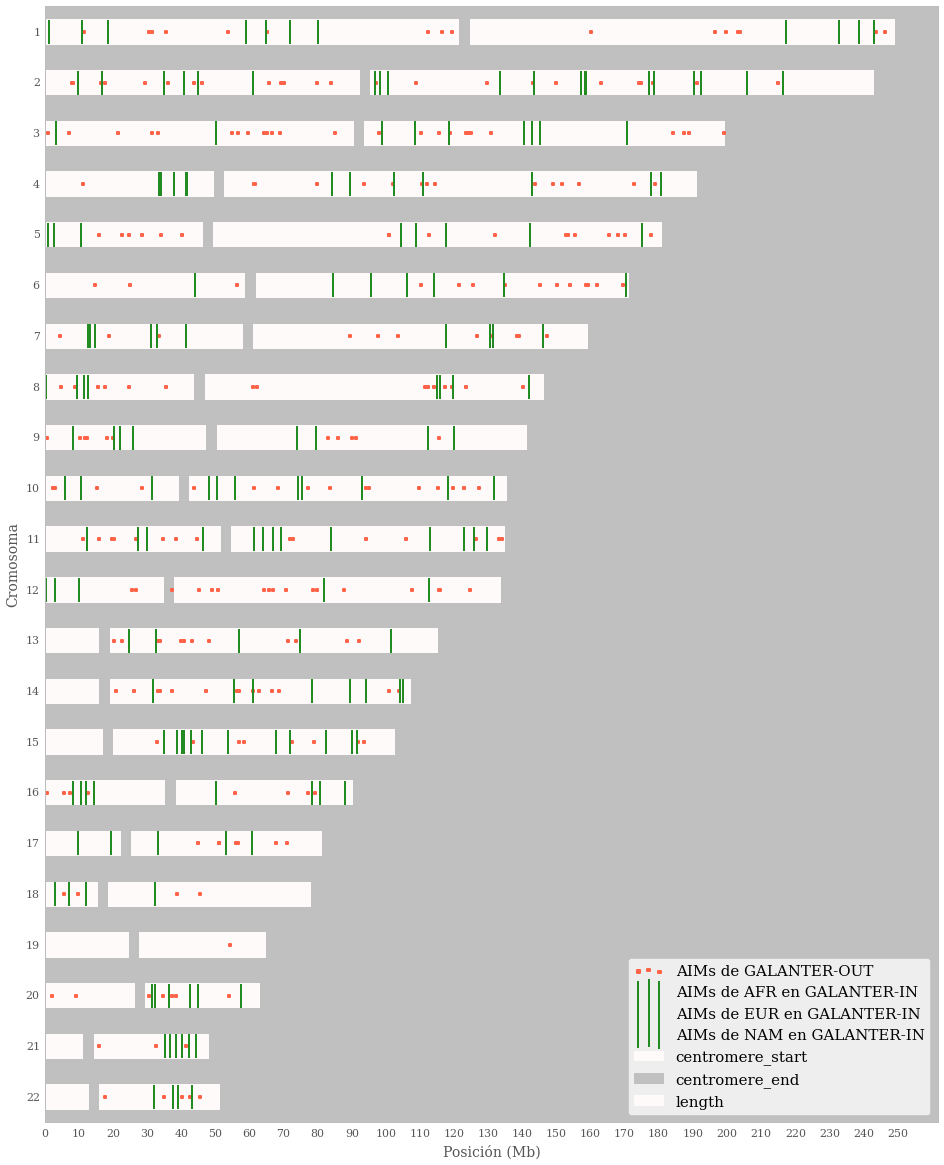

In [51]:
% run chromosomes_with_SNPs_plot.py

from collections import OrderedDict


plot_data = OrderedDict([
    ('AIMs de GALANTER-OUT',
     {'df': missing, 'marker': 's', 's': 7, 'color': 'tomato'}),
        
    ('AIMs de AFR en GALANTER-IN',
     {'df': present[present.population == "AFR"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
        
    ('AIMs de EUR en GALANTER-IN',
     {'df': present[present.population == "EUR"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
        
    ('AIMs de NAM en GALANTER-IN',
     {'df': present[present.population == "NAM"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
])

chromosomes_with_SNPs_plot(genome, plot_data)
plt.show()

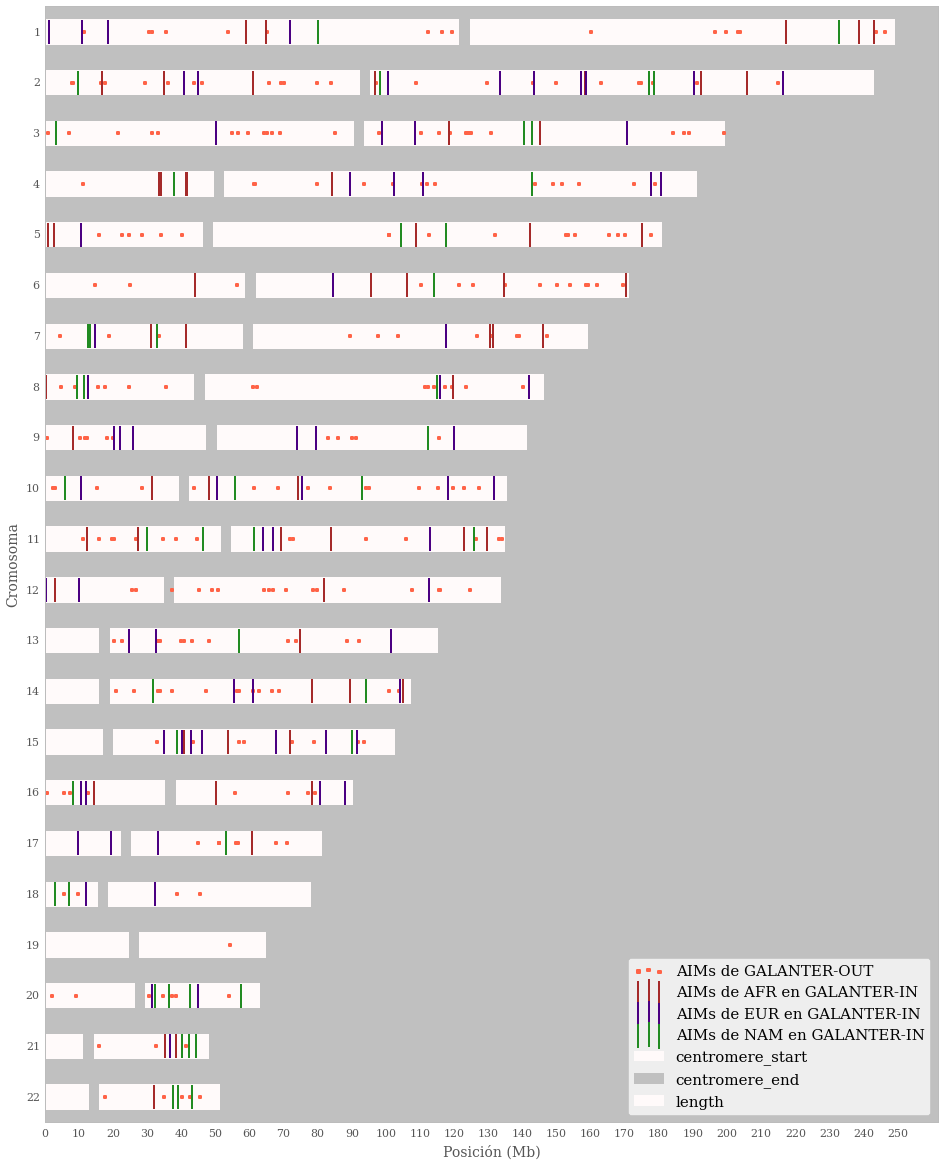

In [82]:
% run chromosomes_with_SNPs_plot.py

from collections import OrderedDict


plot_data = OrderedDict([
    ('AIMs de GALANTER-OUT',
     {'df': missing, 'marker': 's', 's': 7, 'color': 'tomato'}),
        
    ('AIMs de AFR en GALANTER-IN',
     {'df': present[present.population == "AFR"],
      'marker': '|', 'color': 'brown', 's': 600}),
        
    ('AIMs de EUR en GALANTER-IN',
     {'df': present[present.population == "EUR"],
      'marker': '|', 'color': 'indigo', 's': 600}),
        
    ('AIMs de NAM en GALANTER-IN',
     {'df': present[present.population == "NAM"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
])

chromosomes_with_SNPs_plot(genome, plot_data)
plt.show()

In [53]:
def pop_counts(df):
    return df.groupby(['chr', 'population']).size().unstack().fillna('>> 0 <<')

df = pd.merge(pop_counts(galanter), pop_counts(present),
         left_index=True, right_index=True,
         suffixes=['_TOTAL', '_IN'])

df.columns = pd.MultiIndex.from_product([['$GALANTER_{TOTAL}$', '$GALANTER_{IN}$'],
                                         ['AFR', 'EUR', 'NAM']])
df

$GALANTER_{TOTAL}$         $GALANTER_{IN}$                  
                   AFR EUR NAM             AFR      EUR      NAM
chr                                                             
1                    8  15   4               5        4        2
2                   11  21  12               7        9        4
3                    7  16  12               2        4        3
4                    8  12   7               5        5        2
5                    8   8   9               5        1        2
6                    7   7   7               5        1        1
7                    7  10   4               5        2        3
8                    5  10   8               2        3        3
9                    1  11   7               1        6        1
10                   6  13   8               3        5        3
11                   9  12   7               6        3        4
12                   6  13   3               2        3  >> 0 <<
13                   4   8   5               1        3        1
14                   7   6   9               3        3        2
15                   4  12   4               3        7        2
16                   6   8   2               3        4        1
17                   5   5   2               1        3        1
18             >> 0 <<   5   3         >> 0 <<        2        2
20                   1   5   7         >> 0 <<        2        4
21                   4   2   3               2        1        3
22                   1   2   6               1  >> 0 <<        3

**DISCUSIÓN**

La reducción de AIMs en GALANTER-IN determina que ciertos cromosomas no tengan ningún AIM de una población determinada:

- En el cromosoma 12 se perdieron los 3 AIMs de NAM.
- En el cromosoma 20 se perdió el único AIM de AFR.
- En el cromosoma 22 se perdieron los 2 AIMs de EUR.

## Diferenciar por población de referencia, present vs galanter

     $Galanter_{IN}$  $Galanter_{TOTAL}$
AFR         0.344444            0.257848
EUR         0.394444            0.452915
NAM         0.261111            0.289238
     $Galanter_{IN}$  $Galanter_{OUT}$
AFR               53                62
EUR              131                71
NAM               82                47


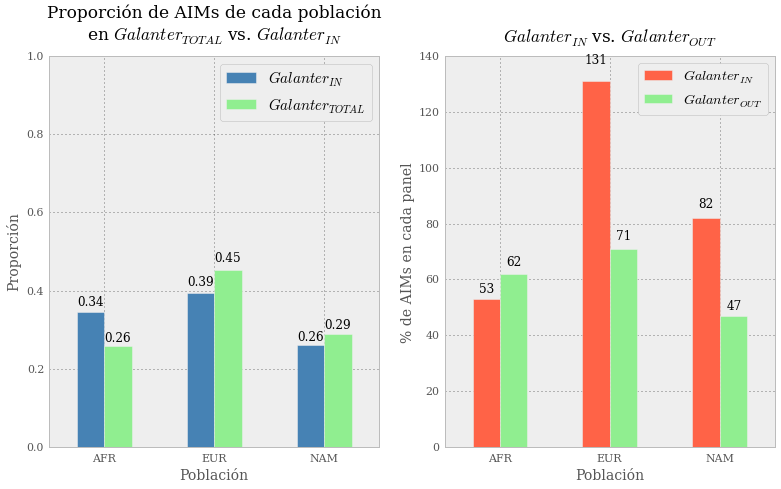

In [54]:
% run superpopulation_ratios_plot.py

superpopulation_ratios_plot(galanter, present)
superpopulation_count_plot(present, missing)

plt.show()

**DISCUSIÓN**

* Los AIMs de Galaner presentes en LAT-1 tienen proporciones poblacionales diferentes a las proporciones del total del panel. En $Galanter_{IN}$
    - la proporción de AFR es .08 mayor
    - la proporción de EUR es .06 menor
    - la proporción de NAM es .03 menor
* Problema: El hecho de que nos quedemos con más AFR en proporción y menos EUR afectará la predición?

# Comparar Galanter con la data de 1000Genomes

In [55]:
# %load /home/juan/tesina/1000genomes/ftp_download_1000_genomes.py

In [56]:
% run extract_SNPs_from_vcf_chromosomes.py

commands = extract_SNPs_from_vcf(galanter.index.values)

# One time only run, to extract the SNPs out of the big chromosome files of 1000genomes:
# run_commands(commands, "/home/juan/tesina/1000genomes")

In [57]:
# !rm dumpfiles/galanter_at_1000genomes.csv
# !rm dumpfiles/galanter_snps_frequencies_in_1000genomes.csv

In [58]:
%run read_1000genomes_data.py
%run read_samples_data.py

samples_file = "/home/juan/tesina/1000genomes/integrated_call_samples_v3.20130502.ALL.panel"
samples = read_samples_data(samples_file)

dumpfile = "dumpfiles/galanter_at_1000genomes.csv"
df_1000genomes = get_or_create_1000genomes_df(dumpfile)

dumpfile = "dumpfiles/galanter_snps_frequencies_in_1000genomes.csv"
frequencies_1000g = get_or_create_1000g_frequencies_df(dumpfile, df_1000genomes, samples)

In [85]:
frequencies_1000g

,ACB,ASW,BEB,CDX,CEU,CHB,CHS,CLM,ESN,FIN,GBR,GIH,GWD,IBS,ITU,JPT,KHV,LWK,MSL,MXL,PEL,PJL,PUR,STU,TSI,YRI,AF,AFR,AMR,EAS,EUR,SAS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
rs2585897,0.80,0.84,0.41,0.21,0.83,0.23,0.18,0.64,0.85,0.78,0.84,0.56,0.87,0.85,0.52,0.20,0.13,0.91,0.84,0.45,0.18,0.58,0.73,0.45,0.87,0.82,0.40,0.15,0.48,0.81,0.17,0.49
rs17359176,0.98,0.97,0.91,0.83,0.91,0.85,0.81,0.74,0.99,0.88,0.93,0.92,1.00,0.95,0.92,0.82,0.85,0.99,0.99,0.60,0.35,0.88,0.83,0.89,0.94,1.00,0.12,0.01,0.35,0.17,0.08,0.10
rs7990216,0.80,0.70,0.42,0.37,0.08,0.41,0.40,0.32,0.90,0.08,0.07,0.40,0.80,0.07,0.38,0.50,0.44,0.93,0.88,0.40,0.55,0.33,0.37,0.47,0.08,0.86,0.54,0.16,0.60,0.58,0.93,0.60
rs394307,0.84,0.85,0.47,0.36,0.36,0.33,0.36,0.59,0.91,0.51,0.44,0.45,0.92,0.42,0.44,0.38,0.41,0.93,0.93,0.72,0.86,0.44,0.57,0.42,0.44,0.94,0.42,0.09,0.32,0.63,0.57,0.56
rs7328696,0.40,0.50,0.96,0.81,0.96,0.84,0.87,0.77,0.36,0.96,0.97,0.99,0.35,0.95,1.00,0.73,0.88,0.37,0.25,0.62,0.52,0.97,0.82,0.99,0.93,0.34,0.26,0.64,0.30,0.17,0.05,0.02
rs1337973,0.89,0.87,0.75,0.43,0.90,0.30,0.22,0.75,0.92,0.93,0.98,0.80,0.93,0.98,0.75,0.19,0.36,0.93,0.94,0.44,0.29,0.81,0.79,0.77,0.93,0.94,0.27,0.08,0.41,0.70,0.05,0.22
rs9576996,0.97,0.91,0.89,0.54,0.91,0.61,0.63,0.76,0.95,0.91,0.95,0.86,0.97,0.95,0.88,0.58,0.60,0.95,0.95,0.59,0.32,0.88,0.80,0.85,0.94,0.95,0.18,0.05,0.37,0.41,0.07,0.13
rs2151236,0.84,0.78,0.35,0.68,0.16,0.61,0.59,0.18,0.97,0.22,0.15,0.27,0.97,0.15,0.34,0.55,0.68,0.95,0.98,0.14,0.14,0.31,0.26,0.36,0.14,0.99,0.51,0.07,0.81,0.38,0.84,0.67
rs9533623,0.89,0.90,0.65,0.86,0.44,0.82,0.78,0.61,0.97,0.50,0.41,0.58,0.98,0.41,0.59,0.84,0.81,0.96,0.99,0.78,0.88,0.61,0.68,0.67,0.45,1.00,0.27,0.04,0.27,0.18,0.56,0.38


Ejemplo de la data de subpoblaciones que busco, para rs2585897:

http://browser.1000genomes.org/Homo_sapiens/Variation/Population?db=core;r=13:21398479-21399479;v=rs2585897;vdb=variation;vf=2188197

### Comparar SNPs

In [59]:
print("1000 Genomas:", len(df_1000genomes))
print("Galanter panel:", len(galanter))

1000 Genomas: 442
Galanter panel: 446


**NOTA** sobre los 4 SNPs que faltan
- un SNP tiene mal el cromosoma en Galanter
- en el proceso de leer la data de 1000 genomas estoy dejando afuera tres SNPs, porque tienen más de 2 variantes.

In [83]:
missing_in_1000g = set(galanter.index) - set(df_1000genomes.index)
galanter.loc[missing_in_1000g]

,chr,position,A1,A2,NAM_AF,EUR_AF,AFR_AF,population,LSBL(Fst),LSBL(In)
SNP rsID,,,,,,,,,,
rs2510719,11,126511001,A,C,0.034,0.574,0.039,EUR,0.341,0.196
rs12065716,1,116575568,G,C,0.389,0.885,0.136,EUR,0.372,0.207
rs10071261,5,1066694,T,C,0.107,0.086,0.903,AFR,0.650,0.375
rs2242865,21,15948902,G,T,0.011,0.156,0.932,AFR,0.695,0.422


### Ver qué subpoblaciones se van en $Galanter_{missing}$ y cuáles quedan

In [61]:
%run population_names.py

dumpfile = "dumpfiles/population_names.csv"
population_names = create_population_names_df(dumpfile)

In [84]:
population_names

,Population Description,Super Population Code
Population Code,,
CHB,"Han Chinese in Bejing, China",EAS
JPT,"Japanese in Tokyo, Japan",EAS
CHS,Southern Han Chinese,EAS
CDX,"Chinese Dai in Xishuangbanna, China",EAS
KHV,"Kinh in Ho Chi Minh City, Vietnam",EAS
CEU,Utah Residents (CEPH) with Northern and Weste...,EUR
TSI,Toscani in Italia,EUR
FIN,Finnish in Finland,EUR
GBR,British in England and Scotland,EUR


In [62]:
def whois(pop_code):
    return population_names.loc[pop_code]['Population Description']

whois('ACB')

'African Caribbeans in Barbados'

In [145]:
% run analyze_populations_in_galanter.py

populations_to_plot = set(samples.population.unique()) | \
                      set(samples.super_population.unique())
    
# dfs = {'$Galanter_{OUT}$': missing,
dfs = {'$Galanter_{IN}$': present,
       '$Galanter_{TOTAL}$': galanter}

for name, df in dfs.items():
    ax = boxplot_freqs_by_population(
        df.join(frequencies_1000g), populations_to_plot,
        title="Promedio de frecuencias alélicas en {}, por población".format(name),
    )
    ax.tick_params(axis='both', which='major', labelsize=14)

    [bar.set_color('coral') for bar in ax.patches[-5:]]
    plt.show()

NameError: name 'boxplot_freqs_by_population' is not defined

#### Discusión

**NOTA**: Los promedios de las superpoblaciones AFR, AMR, EUR, según 1000 Genomas para estos SNPs no coinciden con los mismos promedios de las frecuencias que figuran en Galanter.

* El panel completo $Galanter_{TOTAL}$ está balanceado en cuanto a frecuencias alélicas por población: la mayoría se ubica en un promedio de alrededor de 0.57, para cada subpoblación, con un desvío muy bajo: 0.013.
* Ninguna subpoblación parece haber sido afectada en particular por la subselección de SNPs en $Galanter_{IN}$. Todas las frecuencias alélicas se mantienen entre 0.5 y 0.6, rango que incluye también a todas las frecuencias por subpoblación del panel original.

* **DUDA**: no entiendo por qué si todas las frecuencias de subpoblaciones son ~.56, las frecuencias continentales son más bajas, ~.45

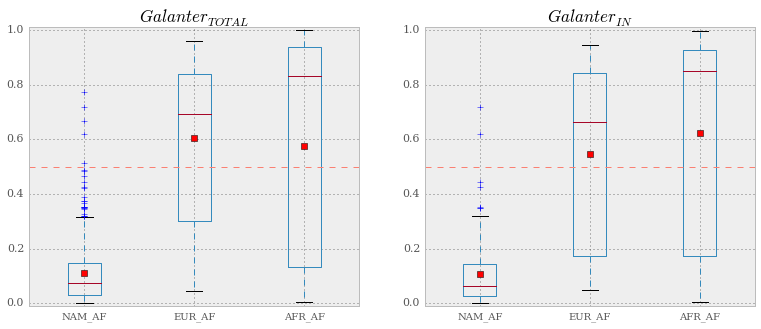

In [127]:
fig, axes = plt.subplots(1, 2, sharey=False)
titles = ("$Galanter_{TOTAL}$", "$Galanter_{IN}$" )

for i, df in enumerate([galanter, present]):
    ax = axes[i]
    df[['NAM_AF', 'EUR_AF', 'AFR_AF']].boxplot(ax=ax, rot=0, showmeans=True)
    ax = axes[i]
    ax.set_title(titles[i])
    ax.set_ylim([-0.01, 1.01])
    ax.axhline(0.5, color='salmon', linestyle='--')

fig.set_figheight(5)
plt.show()

**DISCUSIÓN**

- Si bien la frecuencia de los AIMs africanos es mayor en IN que en TOTAL, no parece haber cambios significativos entre ambos paneles.
- Se evidencia una propiedad del panel de Galanter en general, que afecta también al subconjunto GALANTER-IN: todos los AIMs etiquetados como NAM tienen frecuencias bajas.

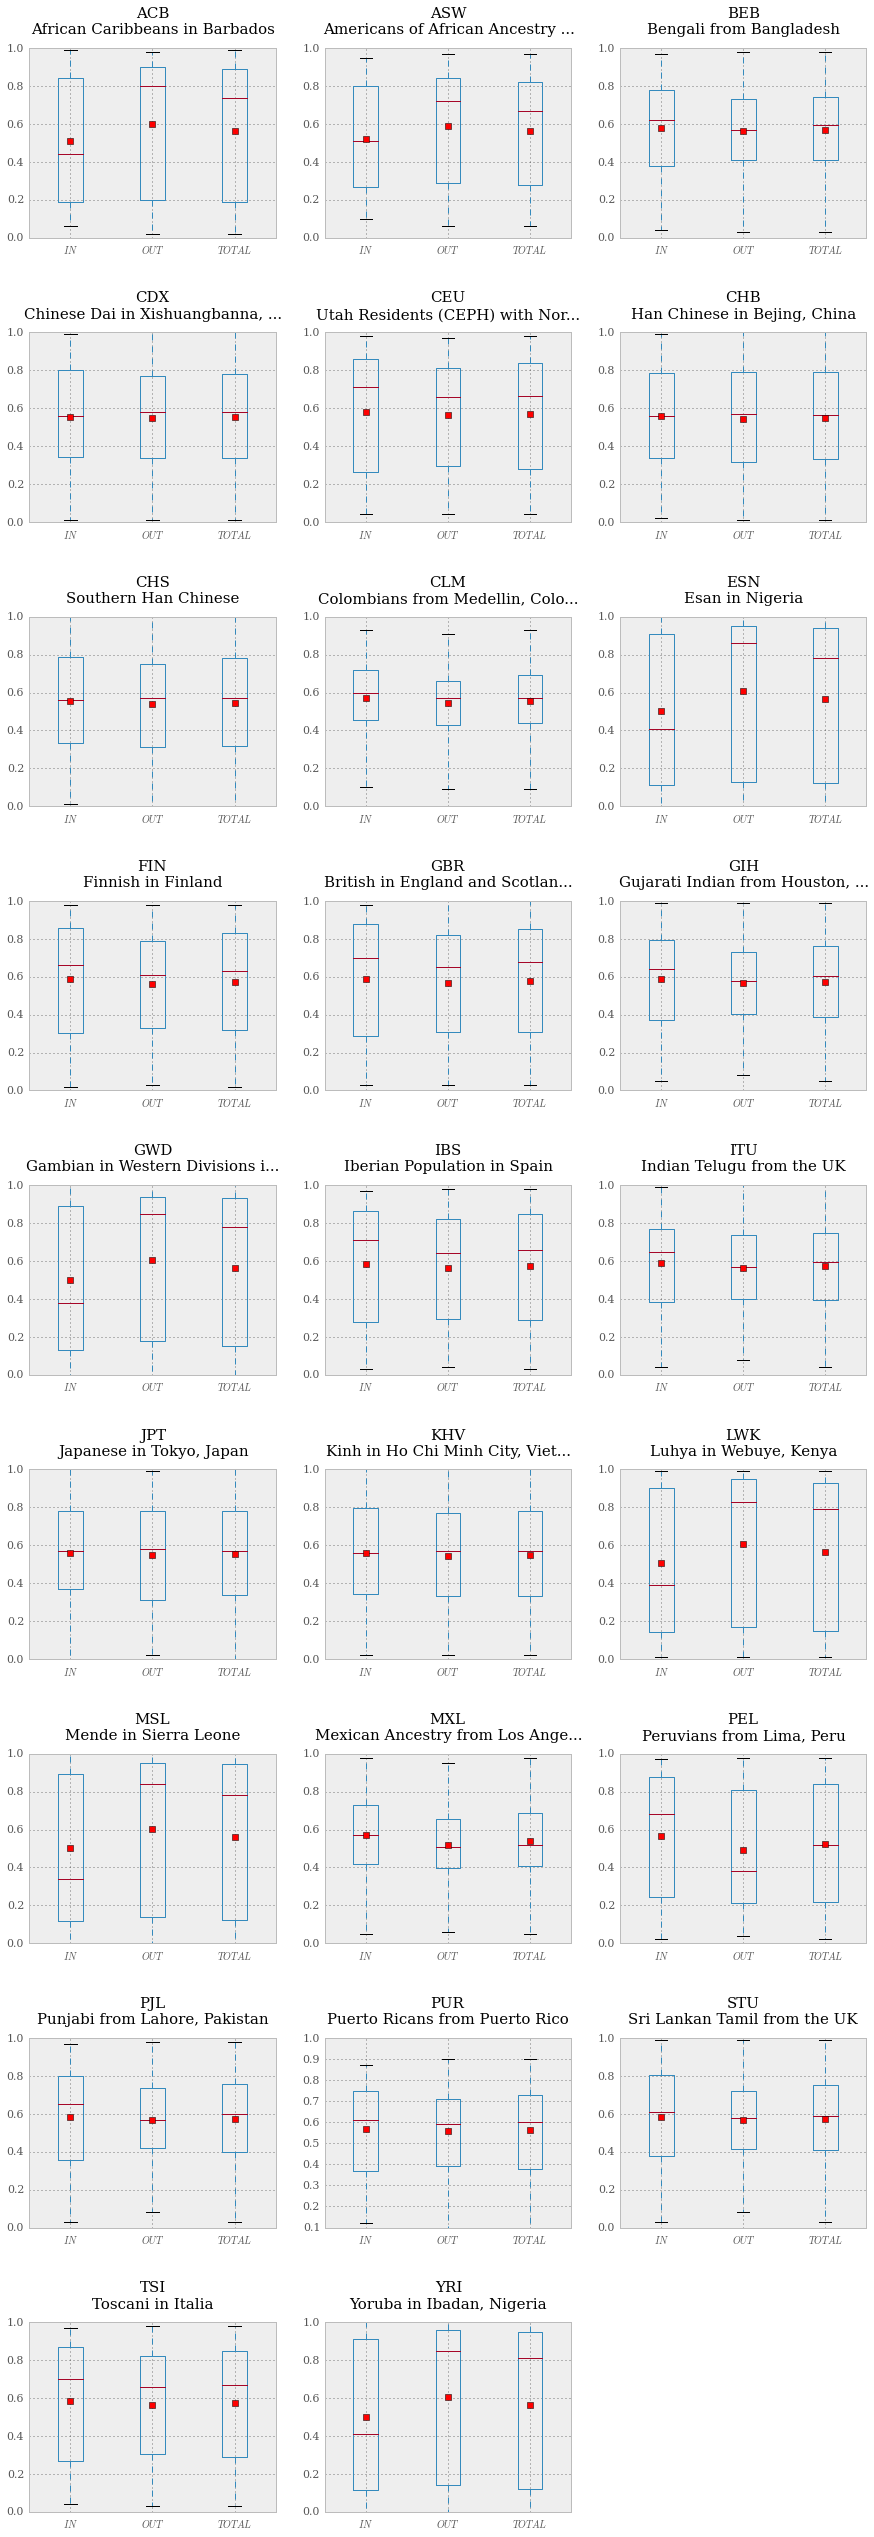

In [65]:
% run helpers/text_helpers.py

populations_to_plot = set(samples.population.unique()) | \
                      set(samples.super_population.unique())
    
get_freqs = lambda df: df.join(frequencies_1000g)[list(populations_to_plot)]

chart_width = 5
chart_height = 5
fig_rows = 18
fig_cols = 3

fig = plt.figure(figsize=(fig_cols * chart_height, fig_rows * chart_width))

for i, population in enumerate(frequencies_1000g.columns[:-6]):
    df = pd.DataFrame({'$TOTAL$': get_freqs(galanter)[population],
                       '$IN$': get_freqs(present)[population],
                       '$OUT$': get_freqs(missing)[population]})

    ax = plt.subplot(fig_rows, fig_cols, i+1)
    pop_description = population_names.loc[population]['Population Description']
    ax.set_title(population + "\n" + trunc_text(pop_description, 30), y=1.05, fontsize=15)    
    df.boxplot(ax=ax, showmeans=True, return_type='both')

plt.show()

**DISCUSIÓN**

- Las diferencias principales parecen estar en subpoblaciones africanas: YRI, MSL, LWK, GWD, ESN, ACB. En todos los casos mencionados, las frecuencias en GALANTER-IN son menores que en GALANTER-TOTAL.

In [66]:
% run stats_tests.py

d = {}

for i, population in enumerate(frequencies_1000g.columns[:-6]):
    df = pd.DataFrame({'$TOTAL$': get_freqs(galanter)[population],
                       '$IN$': get_freqs(present)[population],
                       '$OUT$': get_freqs(missing)[population]})
    
    t, p = t_test(df['$TOTAL$'], df['$IN$'])
    d[population] = {'t': t, 'p': p}

t_tests = pd.DataFrame(d).transpose()
t_tests

,p,t
ACB,0.072829,1.796964
ASW,0.093653,1.679020
BEB,0.671789,-0.423896
CDX,0.851930,-0.186734
CEU,0.678491,-0.414719
CHB,0.673480,-0.421577
CHS,0.729198,-0.346349
CLM,0.289770,-1.059535
ESN,0.084251,1.729314
FIN,0.557558,-0.586791


#### t test para comparar las dos series

In [95]:
mean_frequencies = lambda df: frequencies_1000g.loc[df.index].mean()
std_frequencies = lambda df: frequencies_1000g.loc[df.index].std()

In [68]:
% run stats_tests.py

m("$Galanter_{IN}$")
m(n_test(mean_frequencies(present)))
print()
m("$Galanter_{TOTAL}$")
m(n_test(mean_frequencies(galanter)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

>the farther away the observed or measured sample mean is from the hypothesized mean, the lower the probability (i.e., the p-value) that the null hypothesis is true.

* (?) $Galanter_{total}$ tiene un p-value bajo (0.003), de modo que la $H_0$ no parece verdadera. Es decir, $Galanter_{total}$ no estaría normalmente distribuido.
* (?) $Galanter_{missing}$, por otro lado, tiene un p-value más alto (0.08), pero no tanto, de modo que al menos con una confianza del 90% podemos decir que no está normalmente distribuido. (Está bien esto?)
* Lo que no entiendo del todo es qué implicaría que sí (o que no) esté normalmente distribuido para el panel de Galanter. La selección de SNPs no es azarosa, por qué habríamos de esperar eso?

In [70]:
% run stats_tests.py

# t-test assumes equal variances between the two sets?
# se asumen distribuciones normales??

for txt in t_test(mean_frequencies(galanter), mean_frequencies(present)):
    m(str(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$p > t$

Si la $H_0$ es que ambas medias son estadíticamente iguales, entonces se confirmó?

In [111]:
from collections import OrderedDict

pd.DataFrame(OrderedDict([
    ('$Galanter_{TOTAL}$ mean', mean_frequencies(present)),
    ('$Galanter_{IN}$ mean', mean_frequencies(galanter)),
    ('$Galanter_{TOTAL}$ std', std_frequencies(present)),
    ('$Galanter_{IN}$ std', std_frequencies(galanter))
]))

,$Galanter_{TOTAL}$ mean,$Galanter_{IN}$ mean,$Galanter_{TOTAL}$ std,$Galanter_{IN}$ std
ACB,0.509385,0.563575,0.334224,0.342834
ASW,0.521117,0.562511,0.270318,0.281422
BEB,0.577095,0.568643,0.242282,0.217735
CDX,0.556145,0.551674,0.274065,0.268705
CEU,0.581564,0.570407,0.317983,0.297682
CHB,0.557654,0.547579,0.272994,0.268407
CHS,0.554246,0.545928,0.273797,0.269985
CLM,0.573128,0.555181,0.205850,0.184953
ESN,0.503240,0.564321,0.397309,0.399232
FIN,0.587374,0.572376,0.304264,0.281904


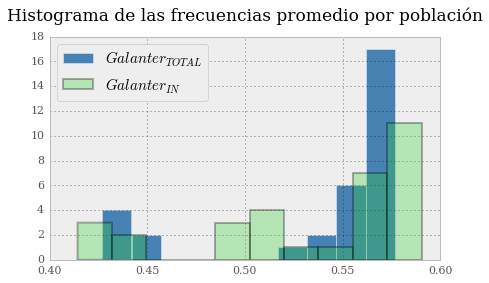

In [89]:
ax = plt.subplot(111)
ax.hist(mean_frequencies(galanter), 10, zorder=0, color='steelblue')
ax.hist(mean_frequencies(present), 10, ec='k', linewidth=2, alpha=.3,
        zorder=1, color='limegreen')
ax.legend(["$Galanter_{TOTAL}$", "$Galanter_{IN}$"], loc='best')
ax.figure.set_figheight(4)
ax.figure.set_figwidth(7)
ax.set_title("Histograma de las frecuencias promedio por población", y=1.05)
plt.show()

**DISCUSIÓN**

* La distribución de frecuencias $Galanter_{IN}$ y $Galanter_{TOTAL}$ parece (_visualmente_) similar.
* Además, la diferencia entre las frecuencias promedio por población parece mínima, con excepciones no demasiado alarmantes (siempre menores a $\pm 0.06$)

In [72]:
import numpy as np
from collections import OrderedDict

df = pd.DataFrame(OrderedDict([
    ('$Galanter_{TOTAL}$', mean_frequencies(galanter)),
    ('$Galanter_{IN}$', mean_frequencies(present)),
    ('freq_diff', mean_frequencies(galanter) - mean_frequencies(present)),
])).sort('$Galanter_{TOTAL}$', ascending=False)

df = df.applymap(lambda n: round(n, 2))
freq_diff = df.join(population_names[['Population Description', 'Super Population Code']]).fillna('')
freq_diff[np.absolute(freq_diff.freq_diff.values) > .05]

,$Galanter_{TOTAL}$,$Galanter_{IN}$,freq_diff,Population Description,Super Population Code
YRI,0.57,0.50,0.06,"Yoruba in Ibadan, Nigeria",AFR
LWK,0.56,0.51,0.06,"Luhya in Webuye, Kenya",AFR
ESN,0.56,0.50,0.06,Esan in Nigeria,AFR
GWD,0.56,0.50,0.06,Gambian in Western Divisions in the Gambia,AFR
MSL,0.56,0.50,0.06,Mende in Sierra Leone,AFR
AFR,0.44,0.50,-0.06,,


**DISCUSIÓN**

Unas pocas subpoblaciones tienen una diferencia leve entre sus frequencias en GALANTER-TOTAL y GALANTER-IN. Son las de la tabla [33], todas tienen un valor $\pm 6$ en G-IN respecto de G-TOTAL.

### Comparar posiciones (Galanter las tiene desplazadas)

In [73]:
positions = galanter[['chr', 'position']].join(df_1000genomes[['CHROM', 'POS']])
positions.columns = ['chr_galanter', 'pos_galanter', 'chr_1000g', 'pos_1000g']
positions['pos_diff'] = positions['pos_galanter'] - positions['pos_1000g']
positions = positions.dropna(axis=0, how='any')
positions = positions.applymap(lambda n: int(n))
format_numbers(positions.head())

,chr_galanter,pos_galanter,chr_1000g,pos_1000g,pos_diff
SNP rsID,,,,,
rs6685064,1,"1,201,155",1,"1,211,292","-10,137"
rs12085319,1,"10,952,065",1,"11,029,478","-77,413"
rs2745285,1,"11,549,445",1,"11,626,858","-77,413"
rs4920310,1,"18,436,476",1,"18,563,889","-127,413"
rs6684063,1,"30,471,927",1,"30,699,340","-227,413"


**DISCUSIÓN**

Las posiciones de la tabla de Galanter para cada SNP difiere del mismo dato obtenido de 1000Genomas, con desplazamientos repetidos para SNPs cercanos y una diferencia que cambia (crece) cada intervalos irregulares. Pareciera que se agregaron nuevas secuencias de "genoma" al genoma humano?

### Comparación de la "heterocigosidad"

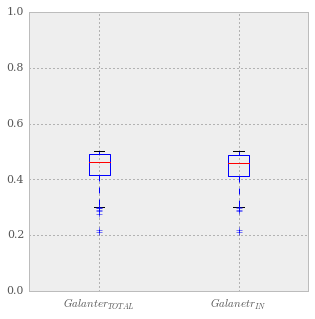

In [74]:
galanter_heter = galanter.join(df_1000genomes, rsuffix='_').heterozygosity
missing_heter = missing.join(df_1000genomes, rsuffix='_').heterozygosity

plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.boxplot([galanter_heter, missing_heter])
ax.set_xticklabels(['$Galanter_{TOTAL}$', '$Galanetr_{IN}$'])
ax.set_ylim([0, 1])
plt.show()

**DISCUSIÓN**

Los datos de 1000Genomes incluyen un valor de heterozigosidad. La distribución de esta métrica parece muy similar en ambos paneles.

## Dot plot de frecuencias por población

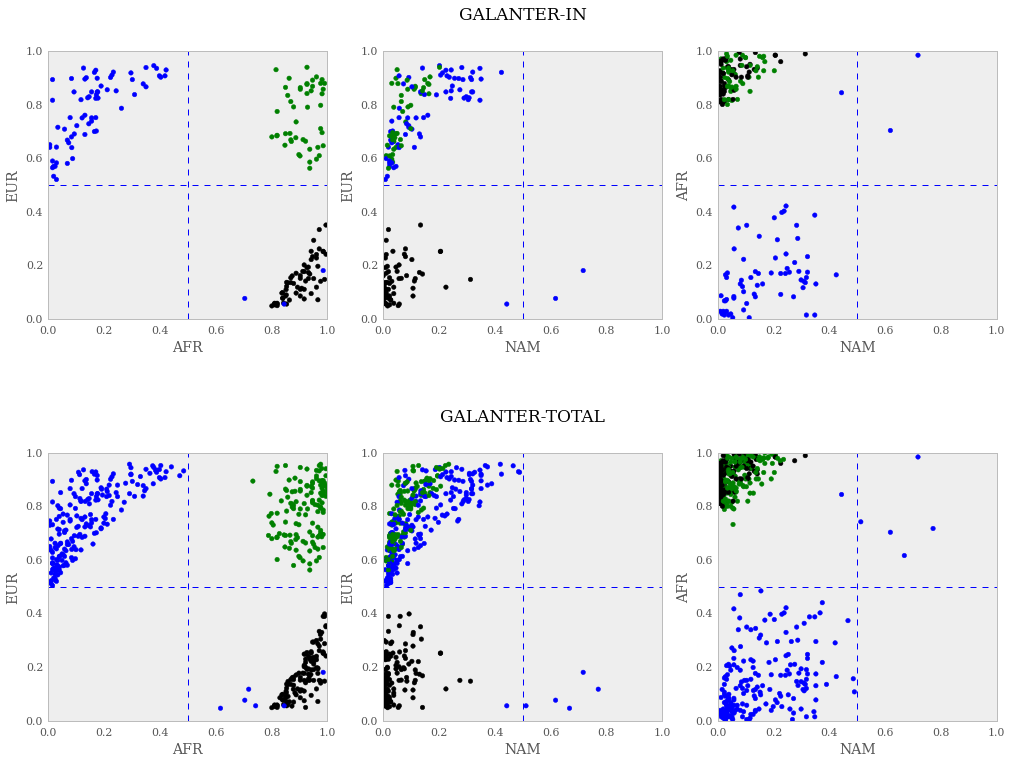

In [75]:
import itertools

height = 6

panels = {'GALANTER-TOTAL': galanter, 'GALANTER-IN': present}
populations = ['NAM_AF', 'AFR_AF', 'EUR_AF']
colors = {'AFR': 'k', 'EUR': 'b', 'NAM': 'g'}
fig = plt.figure(figsize=(17, height * len(panels)))
axes = [plt.subplot(2, 3, n+1) for n in range(6)]

for panel_label, df in panels.items():
    for pop1, pop2 in itertools.combinations(populations, 2):
        ax = axes.pop()
        ax.scatter(df[pop1], df[pop2], color=[colors[p] for p in df.population])
        ax.set_ylim([0, 1])
        ax.set_xlim([0, 1])
        ax.set_xlabel(pop1.replace('_AF', ''))
        ax.set_ylabel(pop2.replace('_AF', ''))
        if len(axes) in [4, 1]:
            ax.set_title(panel_label, y=1.1)
        ax.grid()
        ax.axvline(0.5, linestyle='--')
        ax.axhline(0.5, linestyle='--')

**DISCUSIÓN**:

- Los SNPs utilizados para inferir ancestría AFR y EUR son 'excluyentes': cuando un SNP tiene alta frecuencia en poblaciones africanas, tiene baja frecuencia en europeos, y viceversa.
- Con respecto a los SNPs utilizados para inferir ancestría NAM, tienen una particularidad: son de alta frecuencia tanto en poblaciones africanas como europeas. Del todo el panel, parecen destacarse por tener altas frecuencias en esas dos poblaciones simultáneamente.
- Con respecto a GALANTER-TOTAL vs GALANTER-IN, las distribuciones parecen mantenerse.